# Drive Mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
%pwd

'/content'

# Config Check


In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.0/755.0 kB 7.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [3]:
import torch
from torchvision import transforms

In [4]:
from PIL import Image
import numpy as np
import cv2

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


# Inference

In [24]:
import os
import shutil
import time

directory_path = '/content/drive/MyDrive/Milestone- G5/yolov5/runs/detect'

# Define the folder name to check
folder_to_check = 'exp'

# Combine the directory path and folder name
folder_path = os.path.join(directory_path, folder_to_check)

try:
    if os.path.exists(folder_path):
        shutil.rmtree(folder_path)
        print(f"Previous prediction deleted")
        time.sleep(10)
    else:
        print("All is okay")
except:
    print("All is OKAY")

Previous prediction deleted


In [25]:
%cd /content/drive/MyDrive/Milestone- G5/yolov5

/content/drive/MyDrive/Milestone- G5/yolov5


In [26]:
!python detect.py --weights 'runs/train/yolov5s_results/weights/best.pt'  --conf 0.4 --iou 0.5 --augment --source '/content/drive/MyDrive/Milestone- G5/for_predictions' --save-txt

detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=/content/drive/MyDrive/Milestone- G5/for_predictions, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.5, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=True, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to '/content/drive/MyDrive/Milestone-': No such file or directory
YOLOv5 🚀 2024-4-22 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/2 /content/drive/MyDrive/Milestone- G5/for_predictions/Best.png: 384x640 3 Signboards, 613.3ms
image 2/2 /content/drive/MyDrive/Milestone- G5/for_predictions/Worst.png: 384x640 9 Signboards, 597.5ms
Speed: 2.7ms pre-process,

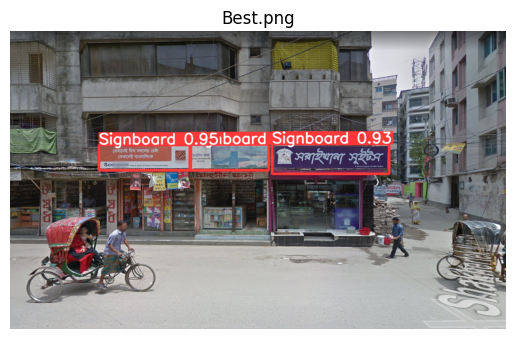

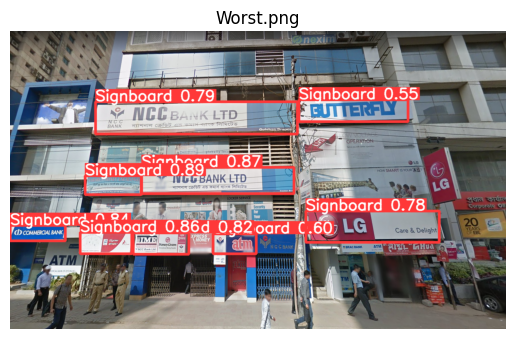

In [27]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to the directory containing images
directory_path = 'runs/detect/exp'

if os.path.exists(directory_path):
    files = os.listdir(directory_path)
    image_files = [file for file in files if file.lower().endswith(('.jpg', '.png'))]

    for image_file in image_files:
        image_path = os.path.join(directory_path, image_file)
        img = mpimg.imread(image_path)
        plt.imshow(img)
        plt.title(image_file)
        plt.axis('off')
        plt.show()
else:
    print(f"The directory '{directory_path}' does not exist.")


# IoU Calculations

In [76]:
%cd /content/drive/MyDrive/Milestone- G5/

/content/drive/MyDrive/Milestone- G5


In [77]:
# function to compute IoU for predicted versus ground truth labels
def compute_iou(gt_box, pred_box):
    x1, y1, w1, h1 = gt_box
    x2, y2, w2, h2 = pred_box

    # produce BBox coordinates from YOLO data
    xmin_gt_box = x1 - w1 / 2
    ymin_gt_box = y1 - h1 / 2
    xmax_gt_box = x1 + w1 / 2
    ymax_gt_box = y1 + h1 / 2

    xmin_pred_box = x2 - w2 / 2
    ymin_pred_box = y2 - h2 / 2
    xmax_pred_box = x2 + w2 / 2
    ymax_pred_box = y2 + h2 / 2

    # calculate intersection of two boxes
    xmin_inter = max(xmin_gt_box, xmin_pred_box)
    ymin_inter = max(ymin_gt_box, ymin_pred_box)
    xmax_inter = min(xmax_gt_box, xmax_pred_box)
    ymax_inter = min(ymax_gt_box, ymax_pred_box)
    inter_area = max(0, xmax_inter - xmin_inter) * max(0, ymax_inter - ymin_inter)

    # calculate union of two boxes
    gt_box_area = w1 * h1
    pred_box_area = w2 * h2
    union_area = gt_box_area + pred_box_area - inter_area

    # IoU equation
    iou = inter_area / union_area if union_area != 0 else 0
    return iou

For best

In [78]:
# Function to convert all elements in a list to float
def convert_to_float(lst):
    return [float(item) for item in lst]

# List to store ground truth coordinates
gt_labels = []
with open('for_predictions/Best.txt', 'r') as file:
    print("\tGround Truth Predictions")
    temp = file.readlines()
    for line in range(len(temp)):
        # Split each line into a list of values and convert to float
        gt_labels.append(convert_to_float(temp[line].split()))
    print(*gt_labels, sep="\n")

# List to store prediction coordinates
pred_labels = []
with open('yolov5/runs/detect/exp/labels/Best.txt', 'r') as file:
    print("\tPredictions")
    temp = file.readlines()
    for line in range(len(temp)):
        # Split each line into a list of values and convert to float
        pred_labels.append(convert_to_float(temp[line].split()))
    print(*pred_labels, sep="\n")


	Ground Truth Predictions
[0.0, 0.64699, 0.425258, 0.2261, 0.075783]
[0.0, 0.271195, 0.424208, 0.17937, 0.077883]
[0.0, 0.44362, 0.428417, 0.1579, 0.0821]
[0.0, 0.441725, 0.485267, 0.14147, 0.027367]
[0.0, 0.129725, 0.486317, 0.11369, 0.029467]
	Predictions
[0.0, 0.4415, 0.423333, 0.159, 0.0866667]
[0.0, 0.646, 0.428333, 0.236, 0.1]
[0.0, 0.2715, 0.424167, 0.185, 0.085]


In [79]:
# Have to select the box manually
gt_box = gt_labels[1][1::]
pred_box = pred_labels[2][1::]

iou = compute_iou(gt_box, pred_box)
print("IoU:", iou)

IoU: 0.8883862454689996


For Worst

In [80]:
# Function to convert all elements in a list to float
def convert_to_float(lst):
    return [float(item) for item in lst]

# List to store ground truth coordinates
gt_labels = []
with open('for_predictions/Worst.txt', 'r') as file:
    print("\tGround Truth Predictions")
    temp = file.readlines()
    for line in range(len(temp)):
        # Split each line into a list of values and convert to float
        gt_labels.append(convert_to_float(temp[line].split()))
    print(*gt_labels, sep="\n")

# List to store prediction coordinates
pred_labels = []
with open('yolov5/runs/detect/exp/labels/Worst.txt', 'r') as file:
    print("\tPredictions")
    temp = file.readlines()
    for line in range(len(temp)):
        # Split each line into a list of values and convert to float
        pred_labels.append(convert_to_float(temp[line].split()))
    print(*pred_labels, sep="\n")


	Ground Truth Predictions
[0.0, 0.294565, 0.615792, 0.09979, 0.09895]
[0.0, 0.39057, 0.622108, 0.09474, 0.111583]
[0.0, 0.485305, 0.61895, 0.09727, 0.109467]
[0.0, 0.205515, 0.615792, 0.08085, 0.111583]
[0.0, 0.868445, 0.480258, 0.05463, 0.170583]
[0.0, 0.597035, 0.524208, 0.02793, 0.130517]
[0.0, 0.733515, 0.656842, 0.26779, 0.10105]
[0.0, 0.725935, 0.535783, 0.24505, 0.132633]
[0.0, 0.94823, 0.566317, 0.10354, 0.067367]
[0.0, 0.950145, 0.653683, 0.09473, 0.061067]
[0.0, 0.76636, 0.729458, 0.192, 0.04425]
[0.0, 0.21183, 0.517892, 0.1061, 0.05895]
[0.0, 0.37288, 0.503158, 0.408, 0.079983]
[0.0, 0.19225, 0.707367, 0.09726, 0.067367]
[0.0, 0.30404, 0.714742, 0.10106, 0.073683]
[0.0, 0.38488, 0.713683, 0.048, 0.067367]
[0.0, 0.46636, 0.715783, 0.05684, 0.050533]
[0.0, 0.537725, 0.706317, 0.08085, 0.069467]
[0.0, 0.054125, 0.674742, 0.10825, 0.06105]
[0.0, 0.37099, 0.294733, 0.39158, 0.0842]
[0.0, 0.693725, 0.262108, 0.22357, 0.077883]
[0.0, 0.70509, 0.393675, 0.25138, 0.126317]
[0.0, 0.37

In [82]:
# Have to select the box manually
gt_box = gt_labels[18][1::]
pred_box = pred_labels[5][1::]

iou = compute_iou(gt_box, pred_box)
print("IoU:", iou)

IoU: 0.8284892272849079


And here the project ends............